In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt

D:\ruanjiananzhuang\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data=pd.read_csv('caicaidata/DigitRecognizer.csv')

In [4]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [7]:
X.shape

(42000, 784)

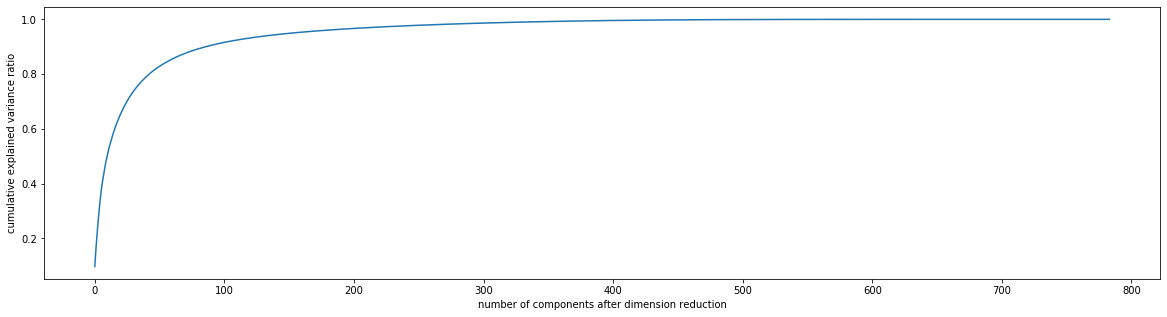

In [8]:
# 画出方差贡献率曲线,确定n
pca_line=PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
plt.show()

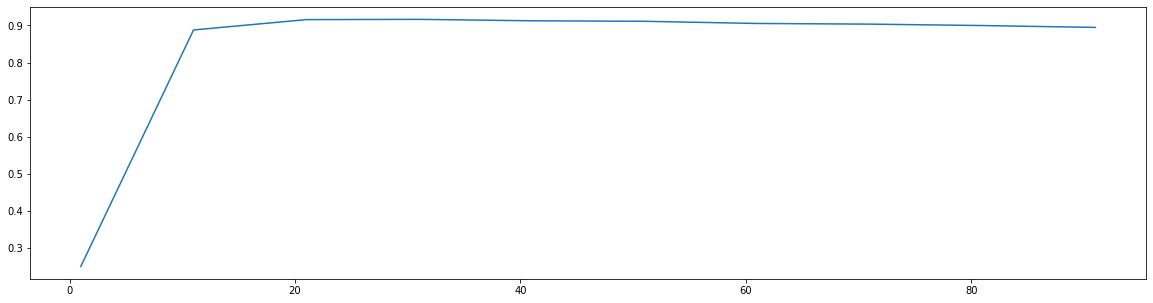

In [11]:
# 粗筛降维个数
score=[]
for i in range(1,101,10):
    X_dr=PCA(i).fit_transform(X)
    once=cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

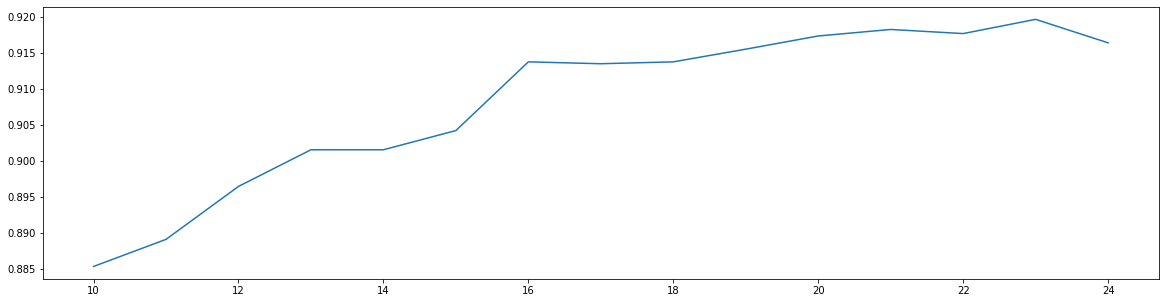

In [13]:
# 细筛降维个数
score=[]
for i in range(10,25):
    X_dr=PCA(i).fit_transform(X)
    once=cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [14]:
# 最佳23
X_dr=PCA(23).fit_transform(X)

In [15]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()

0.9161904761904761

In [16]:
# 调整决策胡n的个数
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9458809523809524

In [17]:
# 继续调参随机森林 或者换模型  784  降维  23 
X_dr.shape 

(42000, 23)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
cross_val_score(KNeighborsClassifier(),X_dr,y,cv=5).mean()

0.9699047619047618

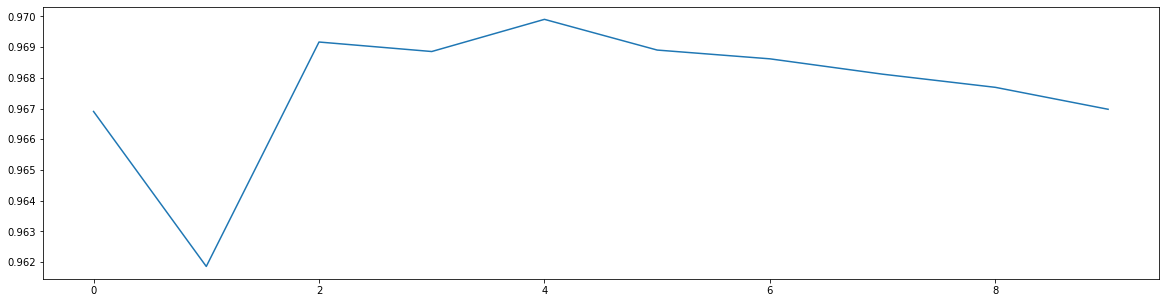

In [20]:
# 确定KNN中k   X_dr=PCA(23).fit_transform(X)
score=[]
for i in range(10):
    once=cross_val_score(KNeighborsClassifier(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [21]:
# i=4，说明k=5
cross_val_score(KNeighborsClassifier(5),X_dr,y,cv=5).mean()

# %%timeit 计算时间  cross_val_score(KNeighborsClassifier(i+1),X_dr,y,cv=5).mean()

0.9699047619047618

In [ ]:
%%timeit 
cross_val_score(KNeighborsClassifier(5),X_dr,y,cv=5).mean()